<a href="https://colab.research.google.com/github/Lucasa98/PDS-2024/blob/main/Guias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**--EJECUTAR ESTE BLOQUE PRIMERO POR UNICA VEZ--**

In [1]:
#-------------- Algoritmos auxiliares --------------
#----------------- ejecutar UNA VEZ ----------------
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

def sin(Tini, Tfin, fs, A, phi, fm):
    Tm = 1/fm
    t = np.arange(Tini, Tfin-Tm, Tm)
    y = A * np.sin(2 * np.pi * fs * t + phi)
    return t, y

def normal(Tini, Tfin, fm):
    Tm = 1/fm
    t = np.arange(Tini, Tfin-Tm, Tm)
    y = (1/np.sqrt(2*np.pi))*np.exp(-np.power(t,2)/2)
    return t,y

def suave(long, fm):
    T = 1/fm
    t = np.arange(-long,long-T,T)
    y = 1+np.sin(np.pi*t/long+np.pi/2)
    return t,y

def delta(tini,tfin,d,fm):
    # tini < d < tfin
    T = 1/fm
    t = np.arange(tini,tfin-T,T)
    y = [0]*len(t)
    y[int((d-tini)/T)] = 1
    return t,y

def convCirc(x,h):
    if len(x) == len(h):
        N = len(x)
        y = [0]*N
        for k in range(N):
            for l in range(N):
                y[k] += h[l]*x[((N+k-l)%N)]
        return y
    return [0]

def square(Tini, Tfin, fs, A, phi, fm):
    Tm = 1/fm
    t = np.arange(Tini, Tfin-Tm, Tm)
    y = A * np.sign(np.sin(2 * np.pi * fs * t + phi))
    return t, y

def ramp(Tini, Tfin, fm):
    Tm = 1/fm
    t = np.arange(Tini, Tfin-Tm, Tm)
    y = t
    return t, y

def midvalue(y):
    x = sorted(y)
    return (x[0]+x[len(y)-1])/2;

def mean(y):
    return sum(y)/len(y);

def maximum(y):
    return max(y);


def amplitude(y):
    return max(y);

def energy(y):
    return sum(np.power(y,2))

def variance(y):
    return np.var(y)

def skewness(y):
    return np.mean(np.power(y,3))

def power(y):
    return np.mean(np.power(y,2))

def action(y):
    return np.sum(abs(y))

def signal_inner_product(x, y):
    return np.dot(x, y)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

def squared_error(y_true, y_pred):
    err = 0
    for i in range(len(y_true)):
        err += (y_pred[i] - y_true[i])**2
    return err

def legendre(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2 * n - 1) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n

def pnorm(y, p):
    return np.power(sum(np.power(np.abs(y), p)), 1/p);

#**=======GUIA 2.1=======**

#----- EJERCICIO 1 -----

Definir entradas

In [ ]:
# ------------------- Ejercicio 1 -------------------
# Alcanza con ejecutar un sola vez
t1,x1 = sin(-1,1,3,2,0,50)   # senial 1
t2,x2 = normal(-2,2,50)      # senial 2
t3,x3 = delta(-1,1,0,50)     # senial 3

'''

-> causal:         y[n] depende de x[n] o y[n-1], etc...

-> lineal          ->  homogeneidad: x[n]->y[n] => ax[n]->ay[n]
                ->  superposicion: x1[n]->y1[n] ^ x2[n]->y2[n]
                                    => x1[n]+x2[n]->y1[n]+y2[n]

-> invariable:     x[n]->y[n] => x[n-k]->y[n-k]

-> con memoria:    y[n] depende de un y[n-k]
'''

In [ ]:
# 1.1
# causal, lineal, variable en el tiempo, sin memoria
taux,xaux = sin(-2,2,3,2,0,50)
y11 = x1 * x1     # salida 1
y12 = xaux * x2   # salida 2
y13 = x1 * x3     # salida 3

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

# Entrada 1
ax = plt.subplot2grid((6, 1),(0, 0))
ax.stem(t1,x1)
ax.set_title("Entrada 1")

ax = plt.subplot2grid((6, 1), (1, 0))
markerline, stemline, baseline, = ax.stem(t1,y11)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 1")

# Entrada 2
ax = plt.subplot2grid((6, 1),(2, 0))
ax.stem(t2,x2)
ax.set_title("Entrada 2")

ax = plt.subplot2grid((6, 1), (3, 0))
markerline, stemline, baseline, = ax.stem(t2,y12)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 2")

# Entrada 3
ax = plt.subplot2grid((6, 1),(4, 0))
ax.stem(t3,x3)
ax.set_title("Entrada 3")

ax = plt.subplot2grid((6, 1), (5, 0))
markerline, stemline, baseline, = ax.stem(t3,y13)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 3")

plt.tight_layout()
plt.show()

In [ ]:
# 1.2
# no causal, lineal,
no = 10

# Sumatoria
y21 = [0]*len(t1)
# primer rango, n-no < 0
for n in range(no+1):                   # n = [0, no]
    for k in range(0,n+no+1):             # k = [0,n+no]
        y21[n] += x1[k]
# segundo rango, n's piolas (n-no >= 0 ^ n+no <= N-1)
for n in range(no+1,len(y21)-no):       # n = [no+1, N-no]
    for k in range(n-no,n+no+1):          # k = [n-no, n+no]
        y21[n] += x1[k]
# tercer rango, n+no > N-1
for n in range(len(y21)-no,len(y21)):   # n = [N-no, N-1]
    for k in range(n-no,len(y21)):        # k = [n-no, N]
        y21[n] += x1[k]

y22 = [0]*len(t2)
for n in range(no+1):
    for k in range(0,n+no+1):
        y22[n] += x2[k]
for n in range(no+1,len(y22)-no):
    for k in range(n-no,n+no+1):
        y22[n] += x2[k]
for n in range(len(y22)-no,len(y22)):
    for k in range(n-no,len(y22)):
        y22[n] += x2[k]

y23 = [0]*len(t3)
for n in range(no+1):
    for k in range(0,n+no+1):
        y23[n] += x3[k]
for n in range(no+1,len(y23)-no):
    for k in range(n-no,n+no+1):
        y23[n] += x3[k]
for n in range(len(y23)-no,len(y23)):
    for k in range(n-no,len(y23)):
        y23[n] += x3[k]

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

# Entrada 1
ax = plt.subplot2grid((6, 1),(0, 0))
ax.stem(t1,x1)
ax.set_title("Entrada 1")

ax = plt.subplot2grid((6, 1), (1, 0))
markerline, stemline, baseline, = ax.stem(t1,y21)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 1")

# Entrada 2
ax = plt.subplot2grid((6, 1),(2, 0))
ax.stem(t2,x2)
ax.set_title("Entrada 2")

ax = plt.subplot2grid((6, 1), (3, 0))
markerline, stemline, baseline, = ax.stem(t2,y22)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 2")

# Entrada 3
ax = plt.subplot2grid((6, 1),(4, 0))
ax.stem(t3,x3)
ax.set_title("Entrada 3")

ax = plt.subplot2grid((6, 1), (5, 0))
markerline, stemline, baseline, = ax.stem(t3,y23)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 3")

plt.tight_layout()
plt.show()

In [ ]:
# 1.3
# causal, no-lineal, invariable en el tiempo, sin memoria
# ES BASICAMENTE UN DESPLAZAMIENTO EN Y
y31 = x1 + 2
y32 = x2 + 2
# por alguna razon no me dejaba hacer lo mismo con y33
y33 = [0]*len(x3)
for i in range(len(x3)):
  y33[i] = x3[i] + 2

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

# Entrada 1
ax = plt.subplot2grid((6, 1),(0, 0))
ax.stem(t1,x1)
ax.set_title("Entrada 1")

ax = plt.subplot2grid((6, 1), (1, 0))
markerline, stemline, baseline, = ax.stem(t1,y31)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 1")

# Entrada 2
ax = plt.subplot2grid((6, 1),(2, 0))
ax.stem(t2,x2)
ax.set_title("Entrada 2")

ax = plt.subplot2grid((6, 1), (3, 0))
markerline, stemline, baseline, = ax.stem(t2,y32)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 2")

# Entrada 3
ax = plt.subplot2grid((6, 1),(4, 0))
ax.stem(t3,x3)
ax.set_title("Entrada 3")

ax = plt.subplot2grid((6, 1), (5, 0))
markerline, stemline, baseline, = ax.stem(t3,y33)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 3")

plt.tight_layout()
plt.show()

In [ ]:
# 1.4
# causal, lineal, variable en el tiempo, sin memoria
y41 = [0]*len(t1)
y42 = [0]*len(t2)
y43 = [0]*len(t3)
for n in range(len(t1)):
    y41[n] = n*x1[n]
for n in range(len(t2)):
    y42[n] = n*x2[n]
for n in range(len(t3)):
    y43[n] = n*x3[n]

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

# Entrada 1
ax = plt.subplot2grid((6, 1),(0, 0))
ax.stem(t1,x1)
ax.set_title("Entrada 1")

ax = plt.subplot2grid((6, 1), (1, 0))
markerline, stemline, baseline, = ax.stem(t1,y41)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 1")

# Entrada 2
ax = plt.subplot2grid((6, 1),(2, 0))
ax.stem(t2,x2)
ax.set_title("Entrada 2")

ax = plt.subplot2grid((6, 1), (3, 0))
markerline, stemline, baseline, = ax.stem(t2,y42)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 2")

# Entrada 3
ax = plt.subplot2grid((6, 1),(4, 0))
ax.stem(t3,x3)
ax.set_title("Entrada 3")

ax = plt.subplot2grid((6, 1), (5, 0))
markerline, stemline, baseline, = ax.stem(t3,y43)
plt.setp(stemline, linewidth = 1)
plt.setp(markerline, markersize = 3)
ax.set_title("Salida 3")

plt.tight_layout()
plt.show()

#----- EJERCICIO 2 -----

Ecuacion en diferencias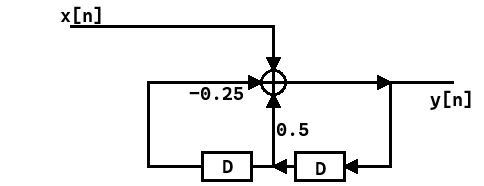

`y[n] = np.sqrt(np.power(x[n],2) + np.power(x[n-1],2) - 2*x[n]*x[n-1])`

In [ ]:
# Ejercicio 2
# y[n] = np.sqrt(np.power(x[n],2) + np.power(x[n-1],2) - 2*x[n]*x[n-1])

t,x1 = sin(-2,2,2,1,0,50) # Entrada 1
t,x2 = normal(-2,2,50)    # Entrada 2

y1 = [0]*len(t)           # Salida 1
y2 = [0]*len(t)           # Salida 2
y1[0]=np.sqrt(np.power(x1[0],2) + np.power(x1[len(t)-1],2) - 2*x1[0]*x1[len(t)-1])
y2[0]=np.sqrt(np.power(x2[0],2) + np.power(x2[len(t)-1],2) - 2*x2[0]*x2[len(t)-1])
for n in range(1,len(t)):
    y1[n]=np.sqrt(np.power(x1[n],2) + np.power(x1[n-1],2) - 2*x1[n]*x1[n-1])
    y2[n]=np.sqrt(np.power(x2[n],2) + np.power(x2[n-1],2) - 2*x2[n]*x2[n-1])

# ------------------------- PLOT -------------------------
plt.figure(figsize=(9, 15))

plt.subplot(4,1,1)
plt.stem(t,x1)
plt.title("Entrada 1")
plt.subplot(4,1,2)
plt.stem(t,y1)
plt.title("Salida 1")
plt.subplot(4,1,3)
plt.stem(t,x2)
plt.title("Entrada 2")
plt.subplot(4,1,4)
plt.stem(t,y2)
plt.title("Salida 2")

plt.tight_layout()
plt.show()

#----- EJERCICIO 3 -----

In [ ]:
# y[n] = x[n] + 0.5*y[n-1] - 0.25*y[n-2]
t,x1 = sin(-2,2,2,1,0,50) # Entrada 1
t,x2 = normal(-2,2,50)    # Entrada 2

y1 = [0]*len(t)
y1[0] = 0
y1[1] = 0
y2 = [0]*len(t)
y2[0] = 0
y2[1] = 0
for n in range(2,len(t)):
    y1[n] = x1[n] + 0.5*y1[n-1] - 0.25*y1[n-2]  # Salida 1
    y2[n] = x2[n] + 0.5*y2[n-1] - 0.25*y2[n-2]  # Salida 2

# ------------------------- PLOT -------------------------
plt.figure(figsize=(9, 15))

plt.subplot(4,1,1)
plt.stem(t,x1)
plt.title("Entrada 1")

plt.subplot(4,1,2)
plt.stem(t,y1)
plt.title("Salida 1")

plt.subplot(4,1,3)
plt.stem(t,x2)
plt.title("Entrada 2")

plt.subplot(4,1,4)
plt.stem(t,y2)
plt.title("Salida 2")


plt.tight_layout()
plt.show()

<img src="https://raw.githubusercontent.com/Lucasa98/PDS-2024/main/Guia2/EjercicioSist3.png">

#----- EJERCICIO 4 -----

In [ ]:
# Ejercicio 4
t,x = delta(-1,1,0,10)  # Entrada

# y1[n] = x[n] + y1[n-2]
# y2[n] = x[n] + 0.5*x[n-1]
# y3[n] = x[n] + 0.5*y[n-1] - 0.25*y[n-2]

y1 = [0]*(len(t))
y2 = [0]*(len(t))
y3 = [0]*(len(t))
for n in range(2,len(t)):
    y1[n] = x[n] + y1[n-2]                      # Salida 1: IIR (Infinite Impulse Response)
    y2[n] = x[n] + 0.5*x[n-1]                   # Salida 2: FIR (Finite Impulse Response)
    y3[n] = x[n] + 0.5*y3[n-1] - 0.25*y3[n-2]   # Salida 3: IIR

# ------------------------- PLOT -------------------------
plt.figure(figsize=(9, 15))

plt.subplot(4,1,1)
plt.stem(t,x)
plt.title("Entrada")
plt.subplot(4,1,2)
plt.stem(t,y1)
plt.title("Salida 1")
plt.subplot(4,1,3)
plt.stem(t,y2)
plt.title("Salida 2")
plt.subplot(4,1,4)
plt.stem(t,y3)
plt.title("Salida 3")


plt.tight_layout()
plt.show()

#**=======GUIA 2.2=======**

#-----EJERCICIO 1-----

In [ ]:
def MatrixConv(x,h):
    '''
    Convolucion de la señal x y h
    de tamaños N y M, respectivament,
    por matriz de convolucion
    '''
    # zeros (filas, columnas)
    H = np.zeros((len(x)+len(h)-1,len(x)))
    for i in range(len(x)+len(h)-1):
        for j in range(max(0,i-len(h)+1),min(i+1,len(x))):
            try:
                H[i][j] = h[i-j]
            except Exception as e:
                print("ERROR: i=",i,", j=",j, e)
    print(H)
    return np.matmul(H,x)

def conv(x,h):
    '''
    Convolucion de la señal x y h
    de tamaños N y M, respectivament,
    por sumatoria de convolucion
    Se presupone N >= M
    '''
    N = len(x)
    M = len(h)
    y = [0]*(N+M-1)
    for n in range(N+M-1):
      if n < M:
        y[n] = h[n]*x[0]
      # se asume h[n]=0 para (-inf,-1] y [M,inf)
      for i in range(max(0, n - M + 1), min(n + 1, N)):
        y[n] += x[i]*h[n-i]
    return y


t,h = suave(0.5,50)
x = [0]*200
for i in range(75,125):
    x[i] = 1

A = [1]
B = h

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

plt.subplot(6,1,1)
plt.stem(x)
plt.title("Señal X")
plt.subplot(6,1,2)
plt.stem(t,h)
plt.title("Señal H")
plt.subplot(6,1,3)
plt.plot(conv(x,h))
plt.title("Sumatoria de convolucion")
plt.subplot(6,1,4)
plt.plot(MatrixConv(x,h))
plt.title("Matrix Conv")
plt.subplot(6,1,5)
plt.plot(np.convolve(x,h))
plt.title("np.convolve")
plt.subplot(6,1,6)
plt.plot(sp.lfilter(B,A,x))
plt.title("LFilter")

plt.tight_layout()
plt.show()

#-----ILUSTRACION EJERCICIO-----

In [ ]:
def respuesta(x,h,t):
    t = np.arange(t,t+len(h))
    y = np.dot(x,h)
    return t,y


x = [0,1,1.5,1.75,1.9,2,1.9,1.75,1.5,1,0]
h = [1,0.75,0.5,0.30,0.15,0.05,0]

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

plt.subplot(5,1,1)
plt.plot(x)
plt.title("x")

plt.subplot(5,1,2)
plt.plot(h)
plt.title("h")

plt.subplot(5,1,3)
plt.plot(x)
sum = [0]*(len(x)+len(h)-1)
for i in range(len(x)):
    t,y = respuesta(x[i],h,i)
    sum[t[0]:t[len(t)-1]+1] = np.sum([sum[t[0]:t[len(t)-1]+1],y],axis=0)
    plt.plot(t,y,'r')
plt.title("respuestas al impulso x[i] con FIR h")

plt.subplot(5,1,4)
plt.plot(sum)
plt.title("sum")

plt.subplot(5,1,5)
plt.plot(np.convolve(x,h))
plt.title("np.convolve")


plt.tight_layout()
plt.show()


#-----EJERCICIO 2-----

In [ ]:
# Ejercicio 2

t,h = suave(2,50)
x = [0]*len(t)
for i in range(75,125):
    x[i] = 1

y = convCirc(x,h)

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

plt.subplot(4,1,1)
plt.plot(t,x)
plt.title("x")
plt.subplot(4,1,2)
plt.plot(t,h)
plt.title("h")
plt.subplot(4,1,3)
plt.plot(t,y)
plt.title("convCirc")
plt.subplot(4,1,4)
plt.plot(t,y)
plt.title("np.conv")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#-----ILUSTRACION Conv Circ-----

len x:  33
 x:  [0, 1, 1.5, 1.75, 1.9, 2, 1.9, 1.75, 1.5, 1, 0]
len h:  7


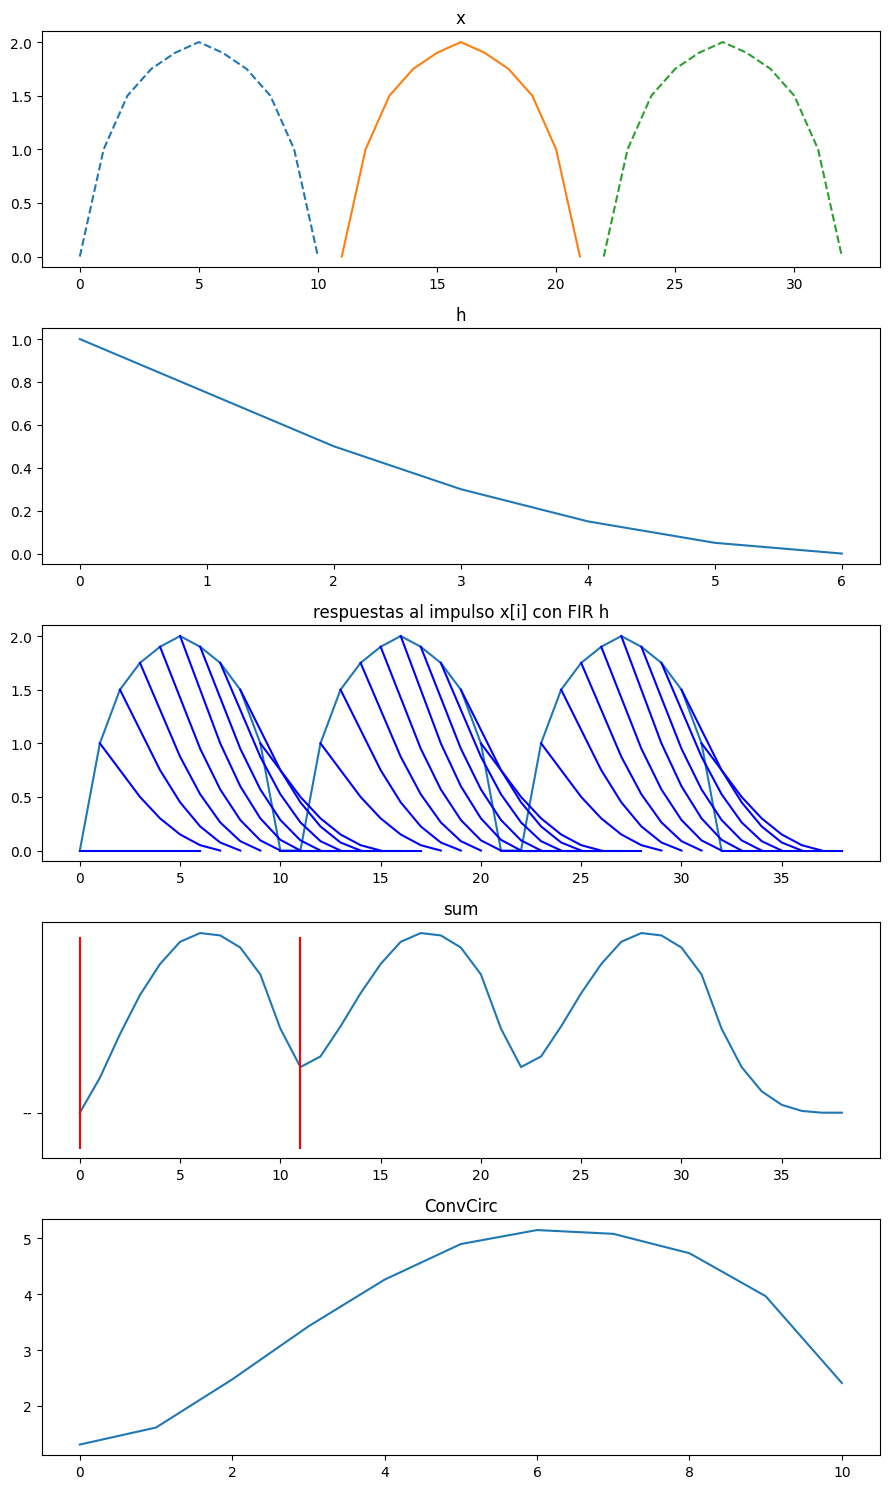

In [47]:
def respuesta(x,h,t):
    t = np.arange(t,t+len(h))
    y = np.dot(x,h)
    return t,y


x = [0,1,1.5,1.75,1.9,2,1.9,1.75,1.5,1,0]
h = [1,0.75,0.5,0.30,0.15,0.05,0]
# convolucion por sumatoria
tConv = np.arange(0,len(x))
yConv = convCirc(x,h+[0,0,0,0])

N = len(x)
M = len(h)

'''
* Para hacer la convolucion circular, vamos a necesitar que x sea periodica
* Concatenamos copias de x y definimos un t, para que la x del "medio"
* comience en t=0
'''
t = range(3*N)
x = x + x + x

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

plt.subplot(5,1,1)
plt.plot(t[:N],x[:N],'--')
plt.plot(t[N:2*N],x[N:2*N])
plt.plot(t[2*N:],x[2*N:],'--')
plt.title("x")

plt.subplot(5,1,2)
plt.plot(h)
plt.title("h")

plt.subplot(5,1,3)
plt.plot(t,x)
sum = [0]*(len(x)+M-1)
for i in range(len(x)):
    t1,y = respuesta(x[i],h,t[i])
    sum[t1[0]:t1[len(t1)-1]+1] = np.sum([sum[t1[0]:t1[len(t1)-1]+1],y],axis=0)
    plt.plot(t1,y,'b')
plt.title("respuestas al impulso x[i] con FIR h")

plt.subplot(5,1,4)
plt.plot(sum)
plt.plot([0,0],[-1,5],'r','--')
plt.plot([N,N],[-1,5],'r','--')
plt.title("sum")

print("len x: ", len(x))
print(" x: ", x[N:2*N])
print("len h: ", len(h))
plt.subplot(5,1,5)
plt.plot(tConv,yConv)
plt.title("ConvCirc")

plt.tight_layout()
plt.show()

#**=======GUIA 3=======**

#-----EJERCICIO 1-----

In [ ]:
#EJERCICIO 1

Tini = 0    # Tiempo inicial
Tfin = 20   # Tiempo final
T =  10     # Periodo
fs = 1/T    # Frecuencia de la Onda
fm = 100    # Frecuencia de la muestra
A = 5       # Amplitud
phi = 0     # Desplazamiento

t1,y1 = square(Tini, Tfin, fs, A, phi, fm)
t2,y2 = sin(Tini, Tfin, fs, A, phi, fm)
t3,y3 = ramp(Tini, Tfin, fm)

# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

plt.subplot(3,1,1)
plt.plot(t1,y1)
print("valor medio y1: ", pnorm(y1,1)/len(y1))
print("maximo y1: ", max(y1))
print("minimo y1: ", min(y1))
print("amplitud y1: ", max(np.abs(y1)))
print("energia y1: ", pnorm(y1,2)**2)
print("accion y1: ", pnorm(y1,1))
print("potencia y1: ", (pnorm(y1,2)**2)/len(y1))
print("raiz del val cuadratico medio:", np.sqrt(pnorm(y1,2)**2)/len(y1))
print()

plt.subplot(3,1,2)
plt.plot(t2,y2)
print("valor medio y1: ", pnorm(y1,1)/len(y1))
print("maximo y1: ", max(y1))
print("minimo y1: ", min(y1))
print("amplitud y1: ", max(np.abs(y1)))
print("energia y1: ", pnorm(y1,2)**2)
print("accion y1: ", pnorm(y1,1))
print("potencia y1: ", (pnorm(y1,2)**2)/len(y1))
print("raiz del val cuadratico medio:", np.sqrt(pnorm(y1,2)**2)/len(y1))
print()

plt.subplot(3,1,3)
plt.plot(t3,y3)
print("valor medio y1: ", pnorm(y1,1)/len(y1))
print("maximo y1: ", max(y1))
print("minimo y1: ", min(y1))
print("amplitud y1: ", max(np.abs(y1)))
print("energia y1: ", pnorm(y1,2)**2)
print("accion y1: ", pnorm(y1,1))
print("potencia y1: ", (pnorm(y1,2)**2)/len(y1))
print("raiz del val cuadratico medio:", np.sqrt(pnorm(y1,2)**2)/len(y1))

plt.tight_layout()
plt.show()


#-----EJERCICIO 2-----

In [ ]:

Tini = 0      # Tiempo inicial
Tfin = 20     # Tiempo final
T =  10       # Periodo
fs = 1/T      # Frecuencia de la Onda
fm = 100      # Frecuencia de la muestra
A = 5         # Amplitud
phi = 3.1416  # Desplazamiento

t1,y1 = sin(Tini, Tfin, fs+fs/2, A, phi, fm)
t2,y2 = sin(Tini, Tfin, fs, A, phi, fm)


# ------------------------ Plot ------------------------
plt.figure(figsize=(9, 15))

print("fs + fs/2 :" , signal_inner_product(y1,y2))
plt.subplot(3,1,1)
plt.plot(t1,y1);
plt.plot(t2,y2);
plt.title(signal_inner_product(y1,y2))


t1,y1 = sin(Tini, Tfin, fs, A, 0, fm)
t2,y2 = sin(Tini, Tfin, fs, A, phi, fm)
print("phi = 0 3.1416:" ,signal_inner_product(y1,y2))
plt.subplot(3,1,2)
plt.plot(t1,y1);
plt.plot(t2,y2);
plt.title(signal_inner_product(y1,y2))

t1,y1 = sin(Tini, Tfin, fs, A, phi/2, fm)
t2,y2 = sin(Tini, Tfin, fs, A, phi, fm)
print("phi = 3.1416 3.1416/2:" ,signal_inner_product(y1,y2))
plt.subplot(3,1,3)
plt.plot(t1,y1);
plt.plot(t2,y2);
plt.title(signal_inner_product(y1,y2))

plt.tight_layout()
plt.show();



#-----EJERCICIO 3-----

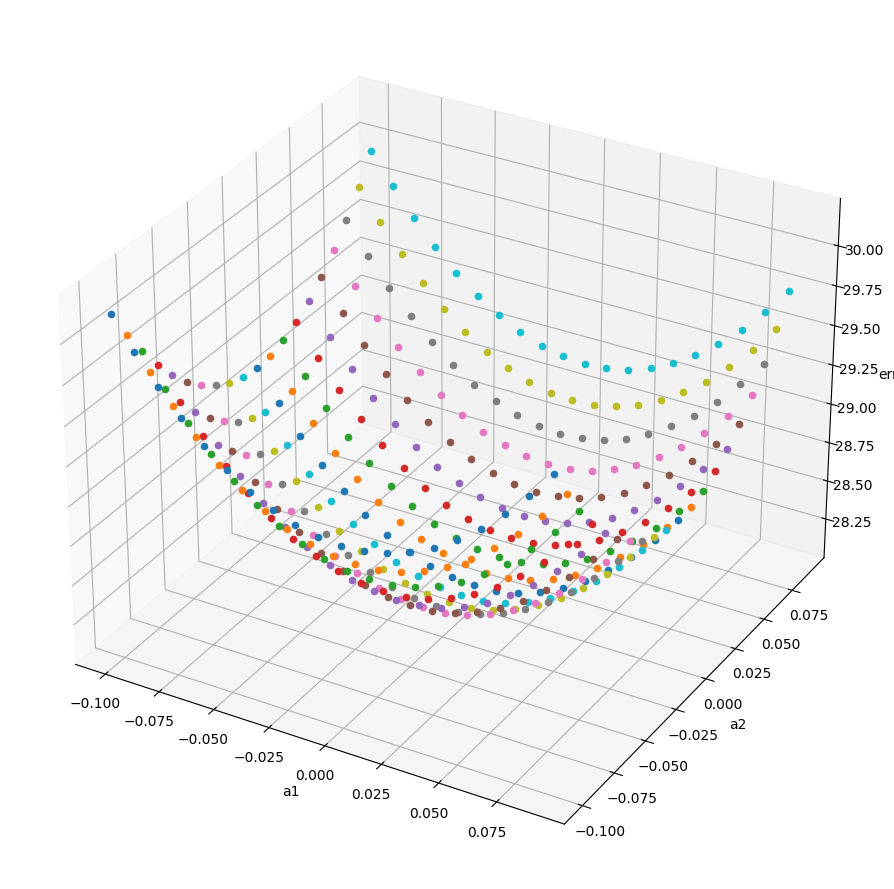

In [ ]:
def leg(x):
    '''
    funcion que retorna el valor en x de la aproximacion por funcion
    de Legendre para un polinomio de Legendre de grado 3
    '''
    y = [0]*len(x)
    for i in range(len(x)):
        y[i] = 45*x[i] - 35*np.power(x[i],3)
        y[i] = y[i]/16

    return y;

def aprox (a1,a2,x):
    '''
    funcion que retorna el valor en x de la aproximacion de Legendre
    para los coeficientes a1 y a2
    '''
    aprox = [0]*len(x)

    var1 = np.sqrt(3/2)

    for i in range(len(x)):
        aprox[i] = a1*(x[i]*var1) + a2*(np.sqrt(7/2)*(5*(x[i]**3)/2 - (3/2)*x[i]))
    return aprox


t = np.arange(-1,1,0.01)
y1 = leg(t)

y2 = [0]*len(t)
for i in range(len(t)):
    if t[i] < 0:
        y2[i] = -1
    else:
        y2[i] = 1


err = squared_error(y1,y2)

# PLOT de la funcion original y la aproximacion
#print("error: ", err)
#plt.plot(t,escalon(t))
#plt.title("y")
#plt.plot(t,leg(t),'r')
#plt.title("aproximacion")
#plt.show()

t1 = np.arange(-0.1,0.1,0.01)

alpha1 = np.sqrt(3/2)
alpha2 = -np.sqrt(7/32)

z = np.zeros((len(t1),len(t1)));

for i in range(len(t1)):
    for j in range(len(t1)):
        auxsignal = [0]*len(t)
        auxsignal = aprox(alpha1+t1[i],alpha2+t1[j],t)
        z[i][j] = squared_error(y2,auxsignal)

# ------------------------ Plot ------------------------
fig = plt.figure(figsize=(9, 15))

ax = fig.add_subplot(111, projection='3d')
for i in range(len(t1)):
    for j in range(len(t1)):
        auxsignal = [0]*len(t)
        auxsignal = aprox(alpha1+t1[i], alpha2+t1[j], t)
        if np.isnan(auxsignal).any():
            continue
        ax.scatter(t1[i], t1[j], z[i][j], marker='o')

ax.set_xlabel('a1')
ax.set_ylabel('a2')
ax.set_zlabel('err')

plt.tight_layout()
plt.show()
